Importamos los paquetes necesarios

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos los datos del dataset 'Iris' y los guardamos en un dataframe de pandas

In [2]:
# Cargamos los datos
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data.head(-5) # Vemos qué aspecto tiene 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0


Graficamos el dataset

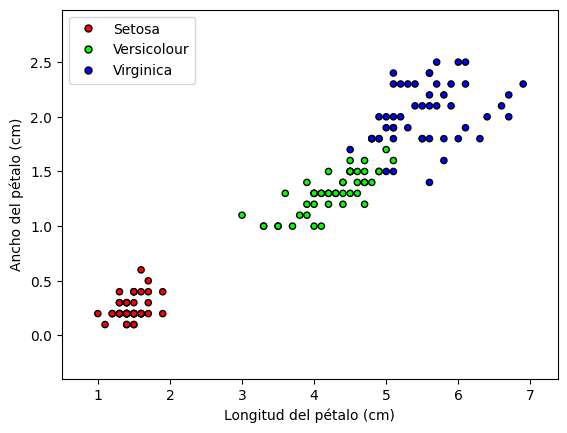

In [3]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

X = iris.data[:, 2:4]  # Usar solo los datos de los pétalos (longitud y ancho del pétalo)
y = iris.target

# Crear una cuadrícula de puntos que cubra el espacio de características relevante
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # tamaño del paso en la cuadrícula
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Crear un mapa de colores personalizado
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Hacemos un scatter con los datos
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')

# Las siguientes líneas son para poner correctamente la leyenda
classes = ['Setosa', 'Versicolour', 'Virginica']

circle_setosa = Line2D([0], [0], label='Setosa', marker='o', markersize=5, 
                markeredgecolor='k', markerfacecolor='#FF0000', linestyle='')
circle_versicolor = Line2D([0], [0], label='Versicolour', marker='o', markersize=5, 
                markeredgecolor='k', markerfacecolor='#00FF00', linestyle='')
circle_virginica = Line2D([0], [0], label='Virginica', marker='o', markersize=5, 
                markeredgecolor='k', markerfacecolor='#0000FF', linestyle='')

handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([circle_setosa, circle_versicolor, circle_virginica])

plt.legend(handles=handles)

plt.savefig('figuras/Iris_ejemplo.pdf', bbox_inches = 'tight')
plt.show()

Definimos nuestra red neuronal

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Convertir las etiquetas a una codificación one-hot
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Dividir el dataset en conjunto de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilar el modelo usando error cuadrático medio como función de pérdida
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Sacamos un resumen de nuestro modelo
model.summary()

2024-06-26 18:46:33.486577: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 18:46:34.956608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jaime/Documents/GitHub/TFM_JaimeGabrielVegas/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173 (692.00 B)

 Trainable params: 173 (692.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenamos nuestro modelo

In [5]:
history = model.fit(X, y, epochs=50, batch_size=5, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2844 - loss: 0.2742
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4195 - loss: 0.2125 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5979 - loss: 0.1930 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6152 - loss: 0.1713 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6739 - loss: 0.1461 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6650 - loss: 0.1349 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7231 - loss: 0.1186 
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7672 - loss: 0.0903 
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8631 - loss: 0.0668
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8986 - loss: 0.0510 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9561 - loss: 0.0334 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

Graficamos la evolución de la función de pérdida

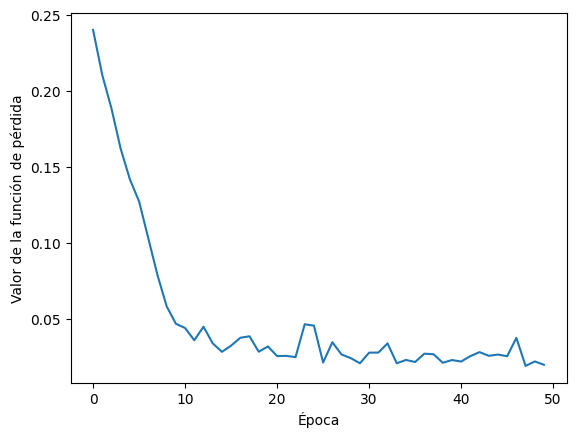

In [6]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Época')
plt.ylabel('Valor de la función de pérdida')
plt.savefig('figuras/Iris_ejemplo_loss.pdf', bbox_inches = 'tight')
plt.show()

Evaluamos la red para toda la región del plano

1833/1833 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step


/tmp/ipykernel_32008/1621092135.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)


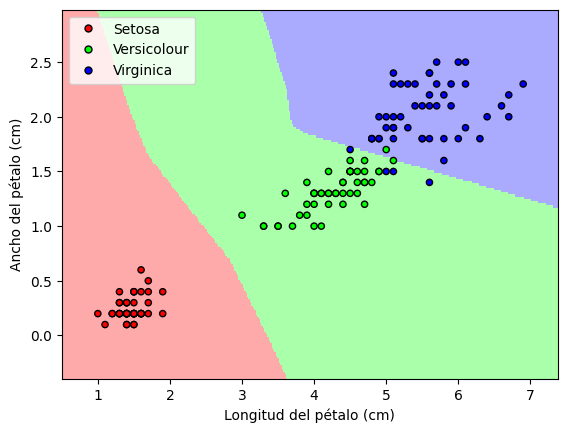

In [7]:
# Obtener las predicciones para cada punto en la cuadrícula
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)

# Convertir las predicciones de nuevo a la forma de la cuadrícula
Z = Z.reshape(xx.shape)

# Graficar los puntos de datos originales
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotear también los puntos de datos originales
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')

plt.legend(handles=handles) # Usamos la leyenda hecha antes

# Añadir la leyenda
#legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#plt.gca().add_artist(legend1)

plt.savefig('figuras/Iris_ejemplo_regiones_mse.pdf', bbox_inches = 'tight')
plt.show()